In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Sommaire</h1>
<div id="toc"></div>

# Chargement des librairies et fichiers excel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
web = pd.read_excel('/Users/ismaelh/Documents/Data Analyst/Projet 5/web.xlsx')

/Users/ismaelh/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
erp = pd.read_excel('/Users/ismaelh/Documents/Data Analyst/Projet 5/erp.xlsx')

In [5]:
liaison = pd.read_excel('/Users/ismaelh/Documents/Data Analyst/Projet 5/liaison.xlsx')

# Nettoyage des données

In [6]:
# Changement du nom de la colonne du df liaison pour la correspondance avec le df web

liaison.rename(columns = {'id_web':'sku'}, inplace = True)

In [7]:
# Visualisation du df web

web.shape

(1513, 28)

In [8]:
# Total de doublons sur le df web

web.duplicated().sum()

82

In [9]:
# Suppression des doublons sur le df web

web = web.drop_duplicates()

In [10]:
# Vérification de la suppression

web.shape

(1431, 28)

In [11]:
# Aperçu du nombre d'éléments null 

web.isnull().sum()

sku                         3
virtual                     0
downloadable                0
rating_count                0
average_rating              1
total_sales                 1
tax_status                715
tax_class                1431
post_author                 1
post_date                   1
post_date_gmt               1
post_content             1431
post_title                  1
post_excerpt              715
post_status                 1
comment_status              1
ping_status                 1
post_password            1431
post_name                   1
post_modified               1
post_modified_gmt           1
post_content_filtered    1431
post_parent                 1
guid                        1
menu_order                  1
post_type                   1
post_mime_type            717
comment_count               1
dtype: int64

In [12]:
# Attribution de la valeur 0 aux valeurs manquantes

web.fillna(0, inplace=True)

In [13]:
# Vérification de l'application du fillna

#web.isnull().sum()

In [14]:
# Vérification types

#web.dtypes

In [15]:
# Visualisation du df erp

erp.shape

(825, 5)

In [16]:
# Controle du nombre de doublons 

erp.duplicated().sum()

0

In [17]:
# Controle du nombre d'éléments null

erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [18]:
# Vérif types

erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [19]:
# Visualisation du df liaison 

liaison.shape

(825, 2)

In [20]:
# Controle du nombre d'éléments null
# info sur le mail du projet : "La liste des product_id est exhaustive, mais pour les
# références côté Web,j’en suis moins sûre... 
# J’ai peiné à rapprocher certaines références."
# rappel : sku = id_web

liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

In [21]:
# Controle du nombre de doublons 

liaison.duplicated().sum()

0

In [22]:
# Verif du type

liaison.dtypes

product_id     int64
sku           object
dtype: object

# Liaison et nettoyage des DataFrames

In [23]:
# Fusion entre les df erp et liaison 

erp_liaison = pd.merge(erp, liaison, on='product_id' ) 
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [24]:
# Fusion entre les df erp, liaison et web

erp_web = pd.merge(web, erp_liaison, on='sku',how='outer') 
erp_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,4954.0,1.0,25.0,0.0,instock
1,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,0,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954.0,1.0,25.0,0.0,instock
2,15298,0.0,0.0,0.0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3847.0,1.0,24.2,0.0,outofstock
3,15298,0.0,0.0,0.0,0.0,6.0,0,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847.0,1.0,24.2,0.0,outofstock
4,15296,0.0,0.0,0.0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3849.0,1.0,34.3,0.0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5954.0,0.0,18.8,0.0,outofstock
1538,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5955.0,0.0,27.3,0.0,outofstock
1539,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5957.0,0.0,39.0,0.0,outofstock
1540,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6100.0,0.0,12.9,0.0,outofstock


In [25]:
# Suppression des NaN

erp_web.dropna(inplace=True)

In [26]:
# Verification des doublons 

erp_web.duplicated().sum()

0

In [27]:
# Aperçu du df
# Remarque : présence de doublons mais avec une variable differente 
# ( voir tax_status ou post_type)

erp_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,4954.0,1.0,25.0,0.0,instock
1,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,0,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954.0,1.0,25.0,0.0,instock
2,15298,0.0,0.0,0.0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3847.0,1.0,24.2,0.0,outofstock
3,15298,0.0,0.0,0.0,0.0,6.0,0,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847.0,1.0,24.2,0.0,outofstock
4,15296,0.0,0.0,0.0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3849.0,1.0,34.3,0.0,outofstock


In [28]:
# Suppression des lignes inutiles faisant 'doublons' 

erp_web = erp_web.loc[erp_web["post_type"]== "product"]

In [29]:
# Verification de la modification du df

erp_web.shape

(714, 33)

# Détermination du Chiffre d'Affaire par produit ainsi que le montant total

In [30]:
# Ajout d'un colonne au df avec le CA par produit 

erp_web['ca_product'] = erp_web['total_sales'] * erp_web['price']

/var/folders/93/8vxwb4t10x7dvsxz5nyktctm0000gn/T/ipykernel_28141/2813654020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_web['ca_product'] = erp_web['total_sales'] * erp_web['price']


In [31]:
# représentation de la réponse CA par produit

l = ['product_id', 'ca_product', 'price', 'total_sales']

erp_web_list = erp_web[l].sort_values(by = ['ca_product'], ascending = False)
erp_web_list.reset_index(drop=True, inplace=True)
erp_web_list

,product_id,ca_product,price,total_sales
0,4334.0,4704.0,49.0,96.0
1,4144.0,4263.0,49.0,87.0
2,4402.0,2288.0,176.0,13.0
3,4142.0,1590.0,53.0,30.0
4,4141.0,1560.0,39.0,40.0
...,...,...,...,...
709,4924.0,0.0,12.8,0.0
710,4115.0,0.0,100.0,0.0
711,4130.0,0.0,23.0,0.0
712,4132.0,0.0,88.4,0.0


In [32]:
# CA vente des produits en ligne

print(' CA vente', erp_web['ca_product'].sum())

 CA vente 70568.6


# Détermination et représentation des outliers

In [33]:
# détermination des outliers grâce au Z-score (z = (x-μ)/σ)
# def Z-score (https://datascience.eu/fr/mathematiques-et-statistiques/quest-ce-quun-z-score/)

threshold = 2 # seuil

mean = np.mean(erp_web.price) # moyenne
std = np.std(erp_web.price) # écart-type empirique

# vérification si le z-score de chaque prix est au-dessus du seuil et ne garder que les résultats positifs

z_score_outlier = [i for i in erp_web.price if (i-mean)/std > threshold]

# liste des outliers Z-score

print('Liste des outliers Z-score: ', z_score_outlier)

# nombre d'outliers avec le Z-score

print("Total d'outliers avec le Z-score: ",len(z_score_outlier))

# détermination du seuil de prix au-dessus duquel une données est un outliers avec le z-score

# (x - mean) / std = 2
# x - mean = 2 * std
# x = 2 * std + mean

seuil_outliers_z = 2 * std + mean
print('Prix seuil : ',round((seuil_outliers_z),2))

# affichage complet des outliers z-score

outliers_z = erp_web.loc[erp_web['price'] > seuil_outliers_z]

outliers_list = outliers_z[l].sort_values(by = ['price'], ascending = False)
outliers_list.reset_index(drop=True, inplace=True)
outliers_list.head(15)


Liste des outliers Z-score:  [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
Total d'outliers avec le Z-score:  30
Prix seuil :  88.08


,product_id,ca_product,price,total_sales
0,4352.0,1125.0,225.0,5.0
1,5001.0,0.0,217.5,0.0
2,5892.0,573.9,191.3,3.0
3,4402.0,2288.0,176.0,13.0
4,5767.0,0.0,175.0,0.0
5,4406.0,0.0,157.0,0.0
6,4904.0,685.0,137.0,5.0
7,6126.0,270.0,135.0,2.0
8,4355.0,1391.5,126.5,11.0
9,5612.0,0.0,124.8,0.0


In [34]:
# Valeur de l'écart-type methode 1 

print( 'Ecart-type avec la methode standard deviation (std) : ', round((std),2))

Ecart-type avec la methode standard deviation (std) :  27.79


In [35]:
# Valeur de l'écart-type methode 2

q75, q25 = np.percentile(erp_web['price'], [75 ,25])
iqr = q75 - q25

print (' Ecart-type avec la methode percentile : ', round((iqr),2))

 Ecart-type avec la methode percentile :  28.08


In [36]:
max_quartile = q75 + 1.5 * iqr 

print('Prix seuil avec calcul percentile : ', round((max_quartile),2))

data_outliers_m2 = erp_web[erp_web.price > max_quartile]
data_outliers_m2

print("Total d'outliers : ",len(data_outliers_m2))

Prix seuil avec calcul percentile :  84.29
Total d'outliers :  32


## Représentation graphique des outliers

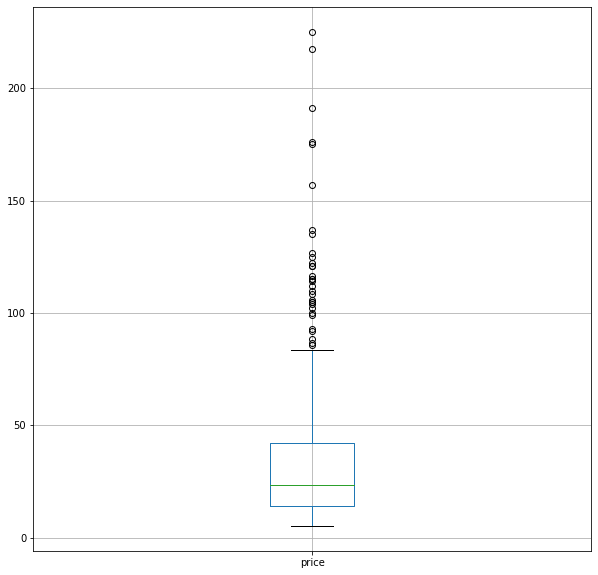

In [37]:
plt.figure(figsize=(10,10))
boxplot = erp_web.boxplot(column=['price'])